# Práctica 5
@Author: Borja Gete & Fernán Ramos @Versión 1.0.0 @Date 06/04/2016

In [1]:
import networkx as nx # librería de análisis de redes
import numpy as np # librería de computación numérica
import matplotlib.pyplot as plt
import scipy.stats as sc
import math as math
#import plotly.plotly as py # Libreria para histogramas
%matplotlib inline

In [2]:
#funcion que devuelve el grado medio de un grafo
def gradoMedio(grafo):
    x=0
    for nodo in grafo.nodes():
        n=grafo.degree(nodo)
        x=x+n
    return x/grafo.number_of_nodes()

In [3]:
#funcion que devuelve el grado máximo de un grafo
def gradoMax(grafo):
    x=sorted(nx.degree(grafo).values(),reverse=True)
    return max(x)

In [4]:
#funcion que devuelve el grado mínimo de un grafo
def gradoMin(grafo):
    x=sorted(nx.degree(grafo).values(),reverse=True)
    return min(x)

## 2 Distribuciones Power Law

### 2.1 Dadas las redes de la figura, ¿cuál de ellas presenta una propiedad scale-free?

La 2ª ya que en la primera imagen observamos que la mayoría de los nodos tiene un número parecido de enlaces, sin gran diferencia entre el que posee mayor número de enlaces y el de menor, en cambio en la 2ª imagen observamos nodos con gran cantidad de enlaces, a los que podemos calificar fácilmente de Hubs

### 2.2 De los siguientes mecanismos ¿cuál de ellos podría generar propiedad scale-free con más probabilidad?

La 2ª: Un usuario crea una página web y añade un enlace a la página que le proporciona
el primer resultado de una búsqueda en Google
Ya que la página del amigo tendrá un número de enlaces similar a nuestra página, en cambio la página bien posicionada en los resultados es altamente probable que referencie a muchas otras páginas (sea un Hub)

## 3 Estudio de la distribución de grado de una red

### 3.1 Estadísticas
#### Calcule las siguientes estadísticas de la red:
● Número de nodos
● Número de enlaces
● Grado medio
● Grado máximo
● Grado mínimo

In [5]:
G = nx.read_gexf('internet_routers-22july06-2.gexf')
print("Número de nodos: %d" % G.number_of_nodes())
print("Número de enlaces: %d" % G.number_of_edges())
print("Grado medio: %.2f" % gradoMedio(G))
print("Grado máximo: %d" % gradoMax(G))
print("Grado mínimo: %d" % gradoMin(G))

Número de nodos: 22963
Número de enlaces: 48436
Grado medio: 4.00
Grado máximo: 2390
Grado mínimo: 1


### 3.2 Histograma
#### Dibuje un histograma de la distribución de grado de la red. Dada una red, la probabilidad de encontrar un nodo con grado k se define como pk=Nk/N (siendo Nk el número de nodos con grado k).
#### Cambie la escala de los ejes de lineal a logarítmica

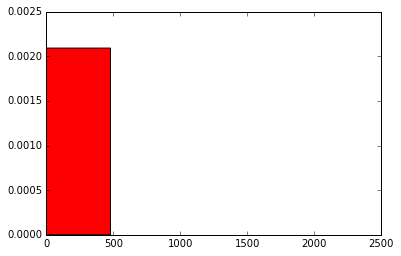

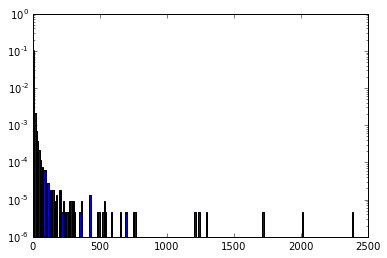

Evidentemente, se visualiza mejor con la escala logaritmica


In [6]:
valores=nx.degree(G).values()
plt.hist(valores,bins=5,color="red",normed=True)
plt.show()
plt.hist(valores,bins=250,log=True,normed=True)
plt.show()
print("Evidentemente, se visualiza mejor con la escala logaritmica")

### 3.3 Histograma con clase variable logaritmica

<Container object of 9 artists>

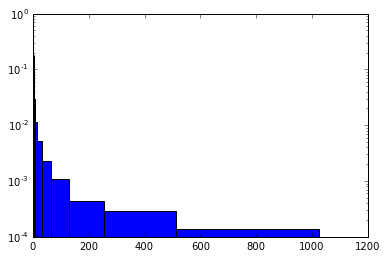

In [7]:
bins=[pow(2,1),pow(2,2),pow(2,3),pow(2,4),pow(2,5),pow(2,6),pow(2,7),pow(2,8),pow(2,9),pow(2,10)]
[val,bins]=np.histogram(valores,bins,normed=True)
binis=[]
for n in range(0,len(bins)-1):
    binis.append(bins[n])
ancho=[]
for n in range(0,len(binis)):
    ancho.append(bins[n+1]-binis[n])
plt.bar(binis,val,ancho,log=True)

### 3.4 Estimación parámetro de power law

In [8]:
pendiente,intercepcion,correlacion,valorp,error=sc.linregress(np.log(val), np.log(binis))
print "Pendiente/Alpha de la power law: %.2f " % pendiente
print "R2 del ajuste: %.2f " % correlacion
print "P-valor: %.2f" % valorp


Pendiente/Alpha de la power law: -0.80 
R2 del ajuste: -0.99 
P-valor: 0.00


### 3.5 Estimación mediante distribución acumulada

Pendiente de la power law: -0.74 
R2 del ajuste: -0.97 
P-valor: 0.00
Alpha de la power law: 1.74 


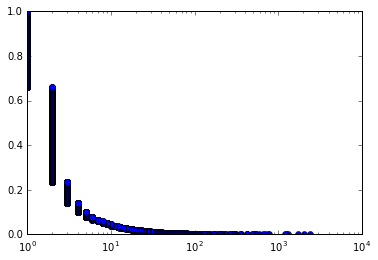

In [43]:
#Ordenamos
x=sorted(nx.degree(G).values(),reverse=True)
dic={}
val1=[]
val2=[]
for n in range(0,len(x)):
    dic[n]=x[n],float(float(n+1)/float(len(x)))
    val1.append(x[n])
    val2.append(float(float(n+1)/float(len(x))))
#Gráfica
plt.plot(val1,val2,'o')
plt.xscale('log')
#plt.yscale('log') #Problemas con el intérprete
pendiente,intercepcion,correlacion,valorp,error=sc.linregress(np.log(val2), np.log(val1))
print "Pendiente de la power law: %.2f " % pendiente
print "R2 del ajuste: %.2f " % correlacion
print "P-valor: %.2f" % valorp
alpha=1-pendiente
print "Alpha de la power law: %.2f " % alpha
